Dataset loaded successfully!

--- EDA: Data Distribution of WRI ---


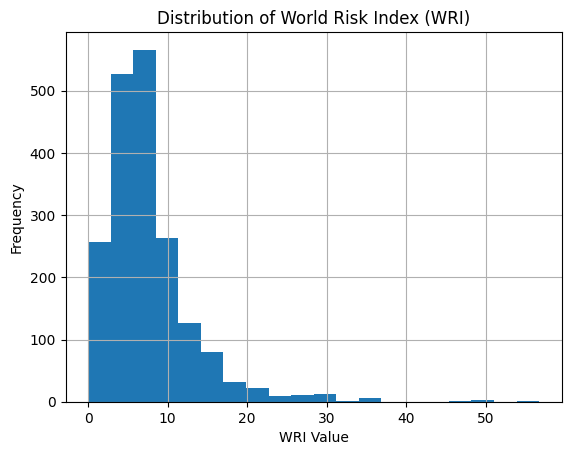


--- EDA: Correlation Matrix Heatmap ---


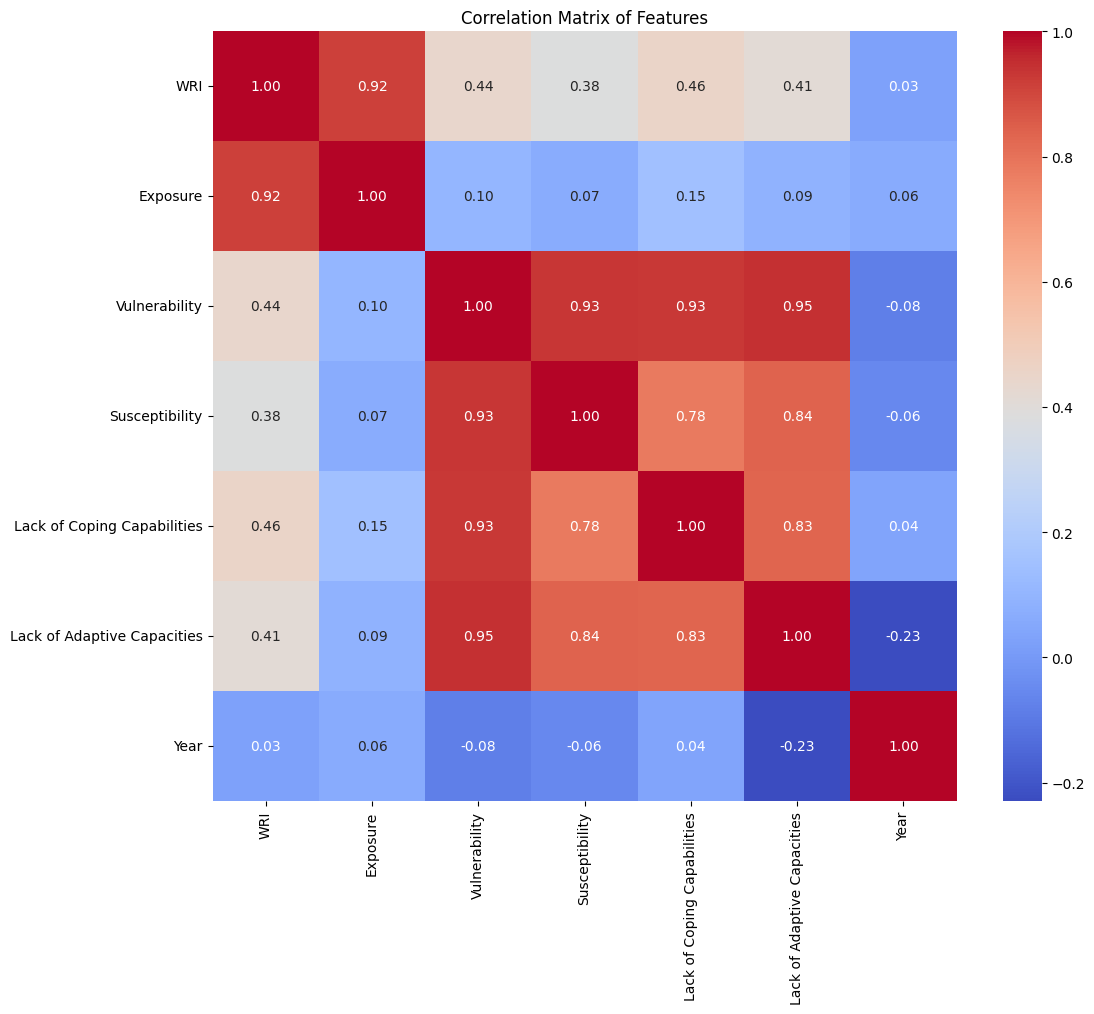


--- Data Transformation: Handling Missing Values ---
Missing values before transformation:
Region                         0
WRI                            0
Exposure                       0
Vulnerability                  0
Susceptibility                 0
Lack of Coping Capabilities    0
Lack of Adaptive Capacities    1
Year                           0
Exposure Category              0
WRI Category                   1
Vulnerability Category         4
Susceptibility Category        0
dtype: int64

Missing values after transformation:
Region                         0
WRI                            0
Exposure                       0
Vulnerability                  0
Susceptibility                 0
Lack of Coping Capabilities    0
Lack of Adaptive Capacities    0
Year                           0
Exposure Category              0
WRI Category                   0
Vulnerability Category         0
Susceptibility Category        0
dtype: int64

--- Data Transformation: Feature Engineering ---

N

/tmp/ipython-input-3393427257.py:60: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(mean_value, inplace=True)
/tmp/ipython-input-3393427257.py:66: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [3]:
# --- Continuing from your Week 1 project file ---

# 1. Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 2. Load the dataset
# The file is uploaded to your session, so this path is correct.
file_path = 'world_risk_index.csv'

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: File not found. Please ensure it's uploaded to your session.")
    df = None

if df is not None:
    # -----------------------------------------------------------
    # Week 2: Exploratory Data Analysis (EDA) and Transformation
    # -----------------------------------------------------------

    # Data Cleaning: Remove leading/trailing spaces from column names
    df.columns = df.columns.str.strip()

    # 3. Exploratory Data Analysis (EDA)

    print("\n--- EDA: Data Distribution of WRI ---")
    # Using the correct column name 'WRI' for the histogram.
    df['WRI'].hist(bins=20)
    plt.title('Distribution of World Risk Index (WRI)')
    plt.xlabel('WRI Value')
    plt.ylabel('Frequency')
    plt.show()

    print("\n--- EDA: Correlation Matrix Heatmap ---")
    # Calculate the correlation matrix for numeric features
    correlation_matrix = df.select_dtypes(include=np.number).corr()

    # Plot the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Features')
    plt.show()

    # 4. Data Transformation

    # a) Handling Missing Values
    print("\n--- Data Transformation: Handling Missing Values ---")
    print("Missing values before transformation:")
    print(df.isnull().sum())

    # A common method is to fill missing numeric values with the mean.
    df_cleaned = df.copy()
    for col in df_cleaned.select_dtypes(include=np.number).columns:
        if df_cleaned[col].isnull().any():
            mean_value = df_cleaned[col].mean()
            df_cleaned[col].fillna(mean_value, inplace=True)

    # Let's fill the missing categorical values with the mode.
    for col in df_cleaned.select_dtypes(include='object').columns:
        if df_cleaned[col].isnull().any():
            mode_value = df_cleaned[col].mode()[0]
            df_cleaned[col].fillna(mode_value, inplace=True)

    print("\nMissing values after transformation:")
    print(df_cleaned.isnull().sum())

    # b) Feature Engineering (Creating a new feature)
    print("\n--- Data Transformation: Feature Engineering ---")
    # Example: Create a new categorical feature from a continuous one.
    # Create a 'WRI_Category' based on the 'WRI'
    bins = [0, 5, 10, 15, 20, 25, 100]
    labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Extreme']
    df_cleaned['WRI_Category_New'] = pd.cut(df_cleaned['WRI'], bins=bins, labels=labels, right=False)

    print("\nNew 'WRI_Category_New' feature created:")
    print(df_cleaned[['WRI', 'WRI_Category_New']].head())

    # 5. Feature Selection

    print("\n--- Feature Selection ---")
    # Based on the correlation heatmap, select the most relevant features.
    selected_features = ['WRI', 'Exposure', 'Vulnerability', 'Lack of Coping Capabilities', 'Lack of Adaptive Capacities', 'WRI_Category_New']

    # Create a new DataFrame with only the selected features
    df_final = df_cleaned[selected_features]

    print("\nFinal DataFrame with selected features:")
    print(df_final.head())
    print(f"\nDataFrame shape after selection: {df_final.shape}")